# WRAP Demonstration
- This notebook provides a minimal demonstration of the WRAP algorithm.
- A realistic dataset is generated and then reconstructed using both WRAP and conventional reconstruction algorithms.

## Module Imports

In [1]:
import numpy as np
import WRAP

## Generate dataset

In [2]:
phis_s, angles_s, BX_s,BY_s,BZ_s, mesh_params_s,MX_s,MY_s,MZ_s,AX_s,AY_s,AZ_s = WRAP.dataset_generator.realistic_sphere()

In [3]:
# Visualise input dataset
WRAP.plotting.interactive_phases(phis_s,angles_s)

interactive(children=(IntSlider(value=9, description='i', max=19), Output()), _dom_classes=('widget-interact',…

## Perform reconstructions

In [4]:
# WRAP reconstruction
bxw,byw,bzw = WRAP.reconstructions.WRAP(phis_s,angles_s,mesh_params_s,n_pad=44,nmaj=3,nmin=10,weight=3e-3,th1=.2,th2=.8)

C:\Users\grlew\OneDrive\Documents\My Github\phd-work\WRAP_code\WRAP.py:1125: RuntimeWarning: divide by zero encountered in true_divide
  new_x = weight_phases(new_x,1/ws[:,0])
C:\Users\grlew\OneDrive\Documents\My Github\phd-work\WRAP_code\WRAP.py:1128: RuntimeWarning: divide by zero encountered in true_divide
  new_y = weight_phases(new_y,1/ws[:,1])


In [5]:
# Conventional reconstruction

# Split input data into x/y tilt series
c =int(np.shape(phis_s)[1]/2)
px = phis_s[:,:c]
py = phis_s[:,c:]
angx=angles_s[:c]
angy=angles_s[c:]

bxc,byc,bzc = WRAP.reconstructions.conventional(px,py,angx,angy,mesh_params_s,niter=5)

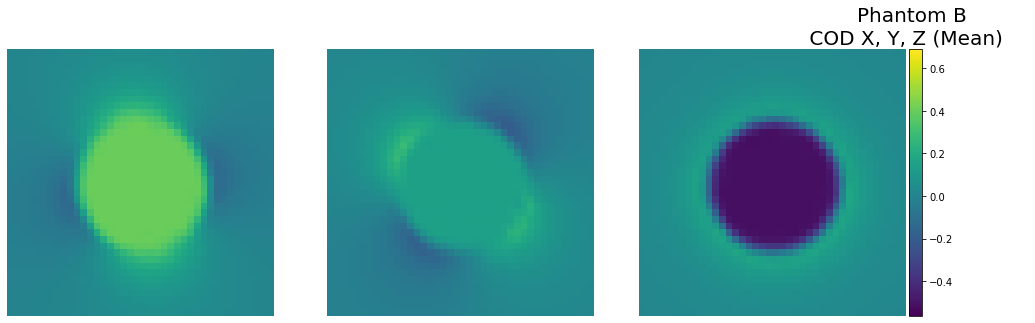

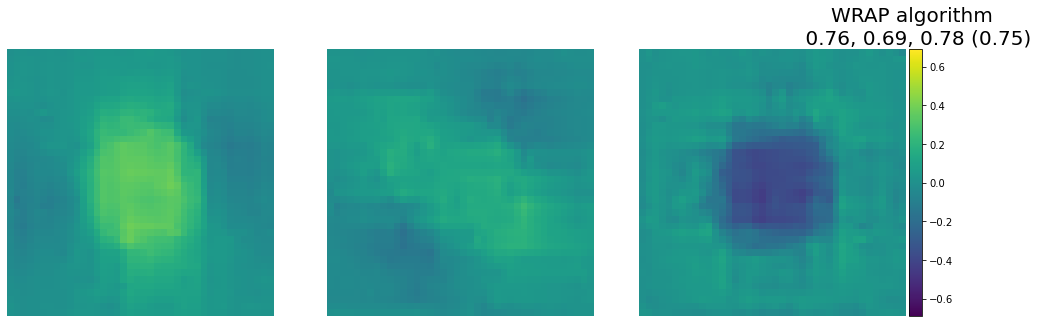

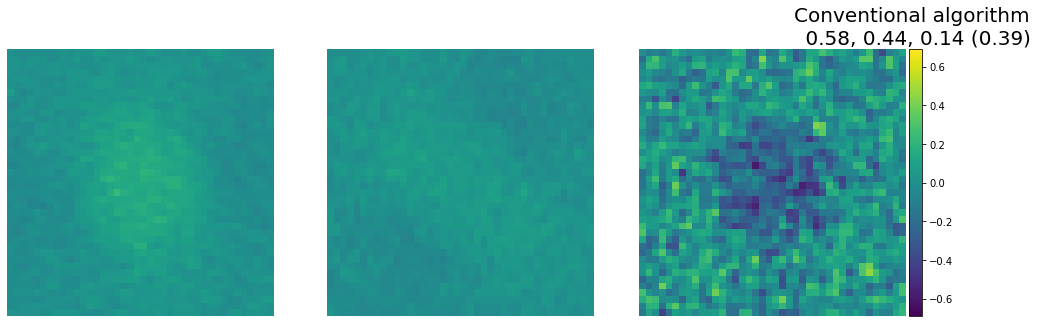

In [6]:
# Visualise results
WRAP.plotting.compare_orthoslices(BX_s,BY_s,BZ_s,bxw,byw,bzw,bxc,byc,bzc)